## Importación de liberías y carga del fichero .csv

In [ ]:
!pip install folium

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import seaborn as sns
%matplotlib inline

# Cargar el archivo CSV en un DataFrame
file_path = '2023_accidents_causa_conductor_gu_bcn_.csv'
df = pd.read_csv(file_path)

## **Funciones**

In [ ]:
#Corrige el número de dígitos de la columna Num_postal
def correccion_num_postal(num):
  if len(str(num)) < 8 or pd.isna(num):
    return -1
  else:
    return num

## **Normalización de los datos**

In [ ]:
#Elimina el espacio en blanco del nombre de la columna
df.columns = df.columns.str.replace('Num_postal ', 'Num_postal')
# Elimina las letras de la columna 'Num_postal' con expresion regular
df['Num_postal'] = df['Num_postal'].astype(str).str.replace(r'[^\d]', '', regex=True)
# Convierte los NaN, dígitos menores de 8 a -1. El -1 significa que el campo no tiene valor.
df['Num_postal'] = df['Num_postal'].apply(correccion_num_postal)

df.head(5)

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_mediata,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud_WGS84,Latitud_WGS84
0,2023S000699,-1,Desconegut,-1,Desconegut,-1,Rovira (ascendent) ...,-1,Dissabte,2023,2,Febrer,4,16,Tarda,Manca d'atenció a la conducció,430443.36,4585232.00,2.166596,41.413783
1,2023S005197,-1,Desconegut,-1,Desconegut,-1,Estatut de Catalunya ...,-1,Divendres,2023,9,Setembre,1,13,Matí,No respectar distàncies,429493.73,4587108.15,2.155015,41.430598
2,2023S007430,-1,Desconegut,-1,Desconegut,-1,Rovira (ascendent) ...,-1,Divendres,2023,12,Desembre,15,11,Matí,No respectar distàncies,430443.36,4585232.00,2.166596,41.413783
3,2023S000961,-1,Desconegut,-1,Desconegut,-1,Amílcar ...,-1,Dissabte,2023,1,Gener,28,14,Tarda,No respectat pas de vianants,430955.45,4586335.10,2.172596,41.423762
4,2023S006486,-1,Desconegut,-1,Desconegut,-1,Augusta / Hort de la Vila ...,-1,Dijous,2023,11,Novembre,2,14,Tarda,Desobeir semàfor,426883.33,4583690.92,2.124189,41.399587


In [ ]:
df['Num_postal'] = df['Num_postal'].apply(correccion_num_postal)
# Crea una nueva columna Data, unificando los campos año, mes, dia y la hora.
df['Data'] = pd.to_datetime(df[['NK_Any', 'Mes_any', 'Dia_mes']].rename(columns={'NK_Any': 'year', 'Mes_any': 'month', 'Dia_mes': 'day'})) + pd.to_timedelta(df['Hora_dia'], unit='h')
df.drop(columns=['NK_Any', 'Mes_any', 'Dia_mes', 'Hora_dia'], inplace=True)
# Convierte columnas categóricas
df['Descripcio_dia_setmana'] = df['Descripcio_dia_setmana'].astype('category')
df['Nom_mes'] = df['Nom_mes'].astype('category')

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Nom_mes,Descripcio_torn,Descripcio_causa_mediata,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud_WGS84,Latitud_WGS84,Data
0,2023S000699,-1,Desconegut,-1,Desconegut,-1,Rovira (ascendent) ...,-1,Dissabte,Febrer,Tarda,Manca d'atenció a la conducció,430443.36,4585232.00,2.166596,41.413783,2023-02-04 16:00:00
1,2023S005197,-1,Desconegut,-1,Desconegut,-1,Estatut de Catalunya ...,-1,Divendres,Setembre,Matí,No respectar distàncies,429493.73,4587108.15,2.155015,41.430598,2023-09-01 13:00:00
2,2023S007430,-1,Desconegut,-1,Desconegut,-1,Rovira (ascendent) ...,-1,Divendres,Desembre,Matí,No respectar distàncies,430443.36,4585232.00,2.166596,41.413783,2023-12-15 11:00:00
3,2023S000961,-1,Desconegut,-1,Desconegut,-1,Amílcar ...,-1,Dissabte,Gener,Tarda,No respectat pas de vianants,430955.45,4586335.10,2.172596,41.423762,2023-01-28 14:00:00
4,2023S006486,-1,Desconegut,-1,Desconegut,-1,Augusta / Hort de la Vila ...,-1,Dijous,Novembre,Tarda,Desobeir semàfor,426883.33,4583690.92,2.124189,41.399587,2023-11-02 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8892,2023S000678,8,Nou Barris,44,Vilapicina i la Torre Llobeta,119003,Fabra i Puig,01810181,Divendres,Febrer,Tarda,Avançament defectuós/improcedent,431379.36,4587039.88,2.177589,41.430147,2023-02-03 17:00:00
8893,2023S006888,8,Nou Barris,44,Vilapicina i la Torre Llobeta,45701,Quinze,00680068,Dilluns,Novembre,Tarda,No respectar distàncies,431122.09,4586910.29,2.174525,41.428957,2023-11-20 14:00:00
8894,2023S007283,8,Nou Barris,45,Porta,256401,Pintor Alsamora,00010001,Divendres,Desembre,Matí,Altres,431890.58,4587477.65,2.183657,41.434133,2023-12-08 06:00:00
8895,2023S007283,8,Nou Barris,45,Porta,256401,Pintor Alsamora,00010001,Divendres,Desembre,Matí,Manca d'atenció a la conducció,431890.58,4587477.65,2.183657,41.434133,2023-12-08 06:00:00


## **EDA**

### Análisis de la causa de los accidentes de tráfico en Barcelona

El objetivo de este análisis en para comprender cuáles son las causas más frecuentes en los accidentes de tráfico.

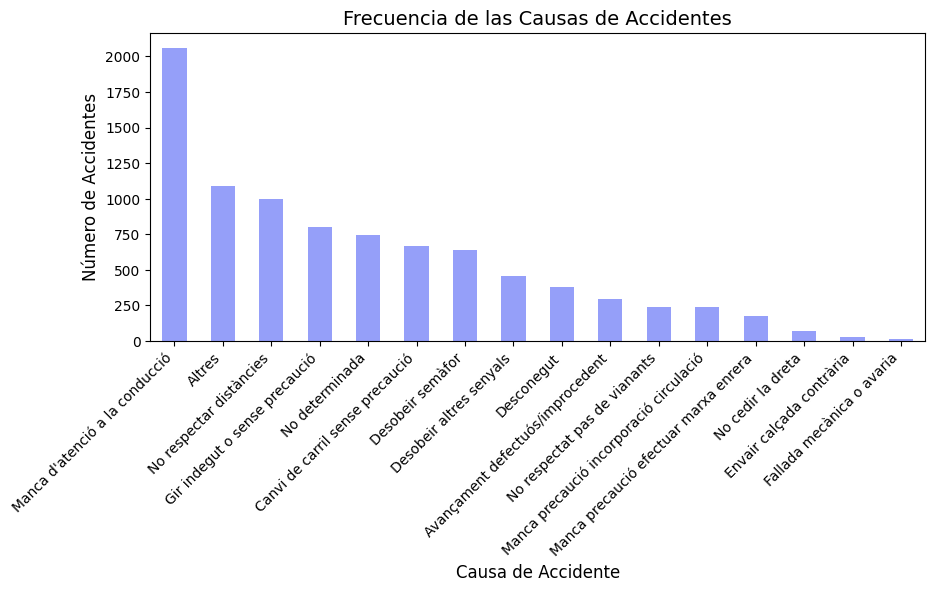

,count
Descripcio_causa_mediata,
Manca d'atenció a la conducció,2061
Altres,1089
No respectar distàncies,996
Gir indegut o sense precaució,804
No determinada,743
Canvi de carril sense precaució,666
Desobeir semàfor,640
Desobeir altres senyals,457
Desconegut,377


In [ ]:
# Contar las frecuencias de cada causa de accidente
df_causa = df['Descripcio_causa_mediata'].value_counts()

# Grafico de barras
plt.figure(figsize=(10, 4))
df_causa.plot(kind='bar', color='#959ff9')

# Etiquetas del gráfico
plt.title('Frecuencia de las Causas de Accidentes', fontsize=14)
plt.xlabel('Causa de Accidente', fontsize=12)
plt.ylabel('Número de Accidentes', fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=45, ha="right")
plt.show()
df_causa

### Distribución de accidentes de tráfico por distrito

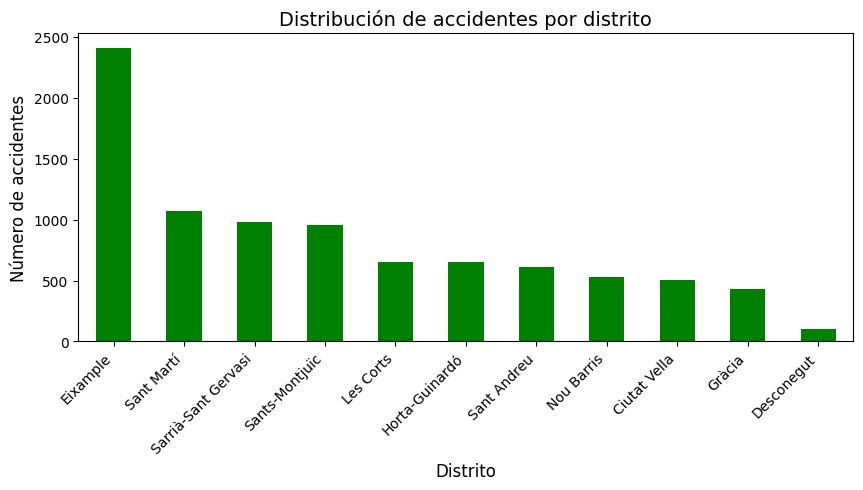

,count
Nom_districte,
Eixample,2407
Sant Martí,1069
Sarrià-Sant Gervasi,977
Sants-Montjuïc,954
Les Corts,655
Horta-Guinardó,651
Sant Andreu,612
Nou Barris,527
Ciutat Vella,507


In [ ]:
#Cuenta el número de accidentes que tiene por cada distrito
df_distrito = df['Nom_districte'].value_counts()

#Gráfico de barras
plt.figure(figsize=(10, 4))
df_distrito.plot(kind='bar', color='green')

# Etiquetas del gráfico
plt.title('Distribución de accidentes por distrito', fontsize=14)
plt.xlabel('Distrito', fontsize=12)
plt.ylabel('Número de accidentes', fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=45, ha="right")
plt.show()
df_distrito

### Distribución de accidentes de tráfico por barrio

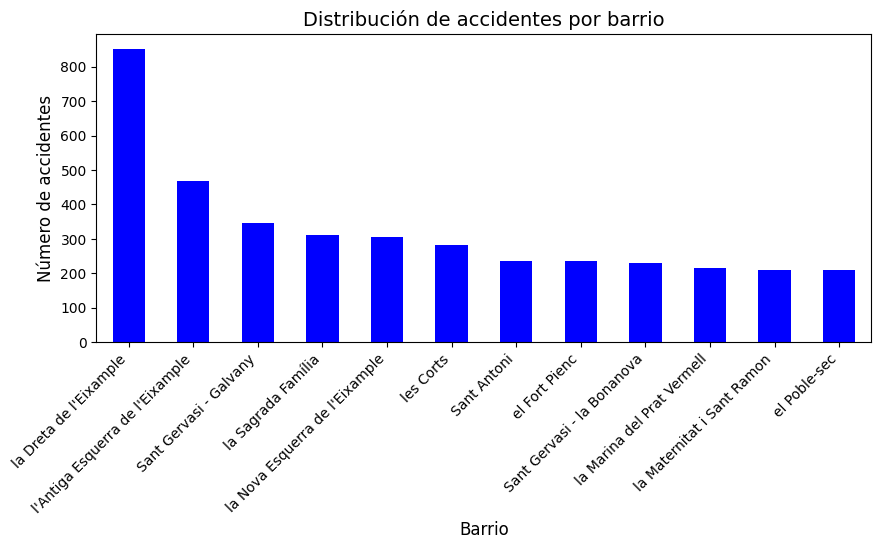

,count
Nom_barri,
la Dreta de l'Eixample,852
l'Antiga Esquerra de l'Eixample,468
Sant Gervasi - Galvany,345
la Sagrada Família,311
la Nova Esquerra de l'Eixample,306
les Corts,283
Sant Antoni,235
el Fort Pienc,235
Sant Gervasi - la Bonanova,229


In [ ]:
#Cuenta el número de accidentes que tiene por barrio
df_distrito = df['Nom_barri'].value_counts()

#Gráfico de barras
plt.figure(figsize=(10, 4))
df_distrito.head(12).plot(kind='bar', color='blue')

# Etiquetas del gráfico
plt.title('Distribución de accidentes por barrio', fontsize=14)
plt.xlabel('Barrio', fontsize=12)
plt.ylabel('Número de accidentes', fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=45, ha="right")
plt.show()
df_distrito.head(12)

### Distribución geográfica

In [ ]:
# Calcula la media de las columnas de Longitud y Latitud
longitud_media = df['Longitud_WGS84'].mean()
latitud_media = df['Latitud_WGS84'].mean()

# Se crea el mapa centrado en la media de las coordenadas de Barcelona
map_accidentes = folium.Map(location=[latitud_media, longitud_media], zoom_start=12)

# Añade los accidentes al mapa
for index, row in df.iterrows():
    folium.Marker([row['Latitud_WGS84'], row['Longitud_WGS84']],
                  popup=f"Accidente en {row['Nom_districte']} - Causa: {row['Descripcio_causa_mediata']}").add_to(map_accidentes)

# Muestra el mapa
map_accidentes.save("mapa_accidentes_bcn.html")


In [ ]:
# Filtra los datos que tienen coordenadas válidas
df_filtro = df[['Latitud_WGS84', 'Longitud_WGS84', 'Nom_districte']].dropna()

# Agrupa los datos por distrito y calcula la media de las coordenadas
distrito_coords = df_filtro.groupby('Nom_districte').agg({
    'Latitud_WGS84': 'mean',
    'Longitud_WGS84': 'mean',
    'Nom_districte': 'count'  # Cuenta el número total de accidentes en cada distrito
}).rename(columns={'Nom_districte': 'Numero_accidentes'}).reset_index()

# Crea un mapa centrado en Barcelona
longitud_media = df_filtro['Longitud_WGS84'].mean()
latitud_media = df_filtro['Latitud_WGS84'].mean()
map_accidentes = folium.Map(location=[latitud_media, longitud_media], zoom_start=12)

# Se añade los marcadores para que muestre el número de accidentes en cada distrito
for index, row in distrito_coords.iterrows():
    folium.Marker(
        location=[row['Latitud_WGS84'], row['Longitud_WGS84']],
        popup=f"{row['Nom_districte']} - {row['Numero_accidentes']} accidentes",
        icon=folium.Icon(color='red')
    ).add_to(map_accidentes)

# Guarda el mapa en un archivo HTML
map_accidentes.save("distrito_barrio_accidentes_bcn.html")


## Entrenamiento de modelos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# El objetivo de este modelo será predecir el distrito
target_columna = 'Nom_districte'

# Preprocesamiento
# Se elimina columnas irrelevantes que no es necesario para el estudio de este modelo
X = df.drop(columns=[target_columna, 'Numero_expedient', 'Nom_carrer', 'Nom_barri', 'Num_postal', 'Latitud_WGS84', 'Longitud_WGS84'])
y = df[target_columna]

# Data se vuelve numerico
if 'Data' in X.columns:
    X['Data'] = pd.to_datetime(X['Data']).apply(lambda date: date.toordinal())

# Codifica las variables categóricas (distrito)
X = pd.get_dummies(X, drop_first=True)

# Codifica la columna objetivo
le = LabelEncoder()
y = le.fit_transform(y)

# Se divide los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escala los datos
scaler = StandardScaler()

# El primer modelo: Random Forest
rf_pipeline = Pipeline([
    ('scaler', scaler),
    ('classifier', RandomForestClassifier(random_state=42))
])

# El segundo modelo: SVM
svm_pipeline = Pipeline([
    ('scaler', scaler),
    ('classifier', SVC(random_state=42))
])

# Se entrena y se evalua Random Forest
print("Random Forest Model:")
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Se entrena y se evalua SVM (Support vector machine)
print("\nSVM Model:")
svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

Random Forest Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00       739
           3       1.00      1.00      1.00       130
           4       1.00      1.00      1.00       171
           5       1.00      1.00      1.00       202
           6       1.00      1.00      1.00       164
           7       1.00      1.00      1.00       178
           8       1.00      1.00      1.00       342
           9       1.00      1.00      1.00       271
          10       1.00      1.00      1.00       311

    accuracy                           1.00      2670
   macro avg       1.00      1.00      1.00      2670
weighted avg       1.00      1.00      1.00      2670

Accuracy: 1.0

SVM Model:
              precision    recall  f1-score   support

           0       0.78      0.67      0.73       135
           1       1.00      0.

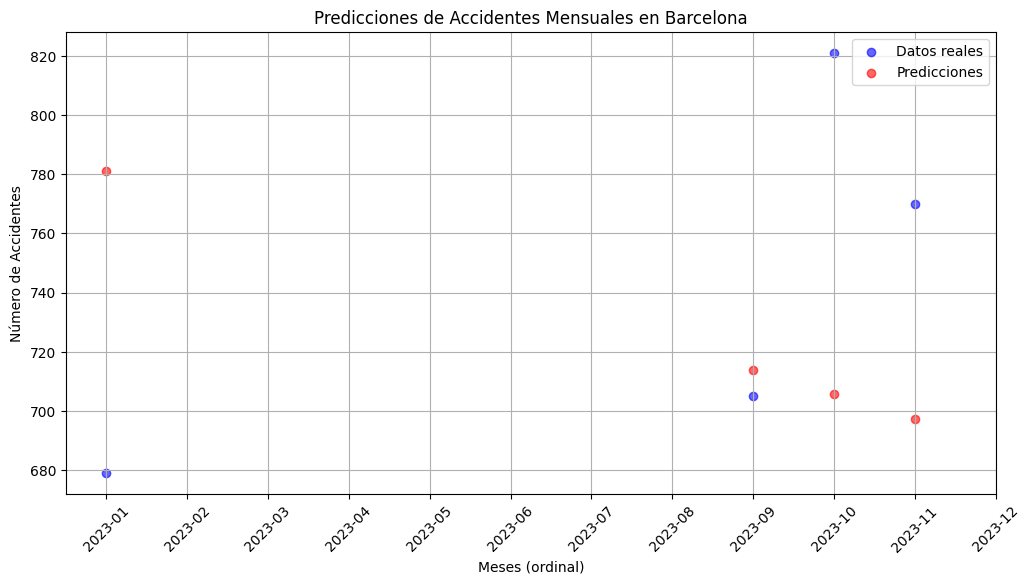

Mean Squared Error: 7289.433292429911
R^2 Score: -1.3608066854012626


In [ ]:
# Convierte la columna 'Data' a ordinal y lo agrupa por mes
df['Data'] = pd.to_datetime(df['Data'])
df['year_month'] = df['Data'].dt.to_period('M')  # Agrupación por mes
df_accidents_per_month = df.groupby('year_month').size().reset_index(name='Numero_accidentes')

# Variables independientes (meses en ordinal) y dependiente (número de accidentes)
X = df_accidents_per_month['year_month'].apply(lambda x: x.ordinal).values.reshape(-1, 1)
y = df_accidents_per_month['Numero_accidentes']

# Se divide los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define el pipeline con preprocesamiento y modelo de regresión lineal
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escala los datos
    ('regression', LinearRegression())  # El modelo de regresión lineal
])

# Se entrena el modelo
pipeline.fit(X_train, y_train)

# Hace predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evalua el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualización del resultado
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales', alpha=0.6)
plt.scatter(X_test, y_pred, color='red', label='Predicciones', alpha=0.6)
plt.title('Predicciones de accidentes mensuales en Barcelona')
plt.xlabel('Meses')
plt.ylabel('Número de accidentes')
plt.xticks(X.flatten(), df_accidents_per_month['year_month'].dt.strftime('%Y-%m').values, rotation=45)
plt.legend()
plt.grid()
plt.show()

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
